# Generate circle dataset

In [1]:
#---------------
# import modules
#---------------

import numpy as np
import joblib as jb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_circles

from neuralNetwork.perceptron import perceptron 

#----------------
#Circle dataset
#----------------
n = 10000 #register number
#p = 2 #featurs over our data

#generating the input X and output y (binary vector)
X_org, y_org = make_circles(n_samples=n, factor=0.1, noise=0.03, random_state=7)
#y = y[:, np.newaxis]

In [2]:
opt = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
n_particulas = 100
n_training = 10
max_iter = 100

# Using with 2 circle

(10000, 2) (10000,)


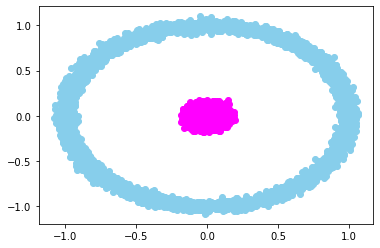

In [3]:
X = X_org
y = y_org
print(X.shape, y.shape)
plt.scatter(X[y==0, 0], X[y==0, 1], c="skyblue")
plt.scatter(X[y==1, 0], X[y==1, 1], c="magenta")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.2, random_state=100)
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")

Training target statistics: Counter({1: 4032, 0: 3968})
Testing target statistics: Counter({0: 1032, 1: 968})


In [ ]:
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))

X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal

gBest_value = []
gBest = []
cost_test = []
metric_train = []

for i in range(n_training):
    # load perceptron
    nn = perceptron(X_sample, X_input, X_class)
    gBest.append( nn.train(X_train, y_train, opt, n_particulas, max_iter) )
    gBest_value.append(nn.best_cost)
    metric_train.append(nn.h_cost)
    y_test_pred = np.argmax(nn.forward(X_test, gBest[i]), axis=1)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost: 
        np.save("pso_gBest_113_100_100_2_10000.npy", gBest[i])
        np.save("pso_gBestIter_113_100_100_2_10000.npy", nn.h_cost)
        np.save("pso_avgBest_113_100_100_2_10000.npy", nn.avg_best_value)
        #np.save("pBest_113_100_100_2_5_1.npy", nn.h_pos)
        
print("=====================================================================")
print("=====================================================================")
print("Saving train metric .... ")
np.save("pso_metric_113_100_100_2_10000.npy", metric_train)
print("The best training is in iteration ", cost_test.index(min(cost_test)))
print("The golbal best value is: ", gBest_value[cost_test.index(min(cost_test))])
print("Test prediction cost: ", min(cost_test))
print("=====================================================================")
print("=====================================================================")

In [6]:
model_load = np.load('pso_gBest_113_100_100_2_10000.npy')

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = np.argmax(nn.forward(X_test, model_load), axis=1)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)


y_train_pred_load = np.argmax(nn.forward(X_train, model_load), axis=1)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)

print('Training: MSE = ', cost_train_load, ' ACC score = ', acc_train_load)
print('Testing: MSE = ', cost_test_load, ' ACC score = ', acc_test_load)
print("=====================================================================")
print("=====================================================================")

Training: MSE =  0.0  ACC score =  1.0
Testing: MSE =  0.0  ACC score =  1.0


# Using 3 circle

In [7]:
X_middle, y_middle = make_circles(n_samples=n, factor = 0.4, noise=0.03, random_state=7)

In [8]:
y_middle[y_middle == 1] = 2
#print(y_small)
X = np.concatenate((X, X_middle[y_middle==2]))
y = np.concatenate((y, y_middle[y_middle==2]))

# Selecting only the n points
shuffled_indices = np.random.permutation(len(X)) #return a permutation of the indices
X = X[shuffled_indices]
y = y[shuffled_indices]
X = X[:n]
y = y[:n]
print (X.shape, y.shape)

(10000, 2) (10000,)


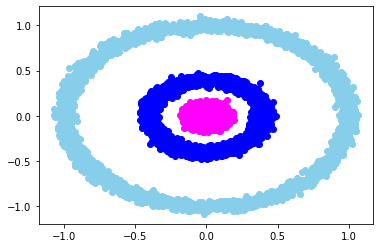

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="skyblue")
plt.scatter(X[y==1, 0], X[y==1, 1], c="magenta")
plt.scatter(X[y==2, 0], X[y==2, 1], c="blue")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.2, random_state=100)
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")

Training target statistics: Counter({1: 2698, 0: 2654, 2: 2648})
Testing target statistics: Counter({1: 681, 0: 673, 2: 646})


In [ ]:
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))

X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal

gBest_value = []
gBest = []
cost_test = []
metric_train = []

for i in range(n_training):
    # load perceptron
    nn = perceptron(X_sample, X_input, X_class)
    gBest.append( nn.train(X_train, y_train, opt, n_particulas, max_iter) )
    gBest_value.append(nn.best_cost)
    metric_train.append(nn.h_cost)
    y_test_pred = np.argmax(nn.forward(X_test, gBest[i]), axis=1)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost: 
        np.save("pso_gBest_113_100_100_3_10000.npy", gBest[i])
        np.save("pso_gBestIter_113_100_100_3_10000.npy", nn.h_cost)
        np.save("pso_avgBest_113_100_100_3_10000.npy", nn.avg_best_value)
        #np.save("pBest_113_100_100_2_5_1.npy", nn.h_pos)
        
print("=====================================================================")
print("=====================================================================")
print("Saving train metric .... ")
np.save("pso_metric_113_100_100_3_10000.npy", metric_train)
print("The best training is in iteration ", cost_test.index(min(cost_test)))
print("The golbal best value is: ", gBest_value[cost_test.index(min(cost_test))])
print("Test prediction cost: ", min(cost_test))
print("=====================================================================")
print("=====================================================================")

In [12]:
model_load = np.load('pso_gBest_113_100_100_3_10000.npy')

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = np.argmax(nn.forward(X_test, model_load), axis=1)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)


y_train_pred_load = np.argmax(nn.forward(X_train, model_load), axis=1)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)

print('Training: MSE = ', cost_train_load, ' ACC score = ', acc_train_load)
print('Testing: MSE = ', cost_test_load, ' ACC score = ', acc_test_load)
print("=====================================================================")
print("=====================================================================")

Training: MSE =  0.0  ACC score =  1.0
Testing: MSE =  0.0  ACC score =  1.0


# Using 4 circles

In [13]:
X_middle_up, y_middle_up = make_circles(n_samples=n, factor = 0.7, noise=0.03, random_state=7)

In [14]:
y_middle_up[y_middle_up == 1] = 3
#print(y_small)
X = np.concatenate((X, X_middle_up[y_middle_up==3]))
y = np.concatenate((y, y_middle_up[y_middle_up==3]))

# Selecting only the n points
shuffled_indices = np.random.permutation(len(X)) #return a permutation of the indices
X = X[shuffled_indices]
y = y[shuffled_indices]
X = X[:n]
y = y[:n]
print (X.shape, y.shape)

(10000, 2) (10000,)


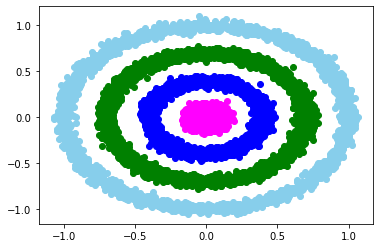

In [15]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="skyblue")
plt.scatter(X[y==1, 0], X[y==1, 1], c="magenta")
plt.scatter(X[y==2, 0], X[y==2, 1], c="blue")
plt.scatter(X[y==3, 0], X[y==3, 1], c="green")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.2, random_state=100)
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")

Training target statistics: Counter({3: 2644, 1: 1848, 2: 1768, 0: 1740})
Testing target statistics: Counter({3: 664, 0: 464, 2: 458, 1: 414})


In [ ]:
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))

X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal

gBest_value = []
gBest = []
cost_test = []
metric_train = []

for i in range(n_training):
    # load perceptron
    nn = perceptron(X_sample, X_input, X_class)
    gBest.append( nn.train(X_train, y_train, opt, n_particulas, max_iter) )
    gBest_value.append(nn.best_cost)
    metric_train.append(nn.h_cost)
    y_test_pred = np.argmax(nn.forward(X_test, gBest[i]), axis=1)
    cost_test.append(mean_squared_error(y_test, y_test_pred))
    print ('Test prediction cost with training: ', cost_test[i]) 
    min_cost = min(cost_test)
    print ("Min test prediction cost: ", min_cost)
    if  cost_test[i] <= min_cost: 
        np.save("pso_gBest_113_100_100_4_10000.npy", gBest[i])
        np.save("pso_gBestIter_113_100_100_4_10000.npy", nn.h_cost)
        np.save("pso_avgBest_113_100_100_4_10000.npy", nn.avg_best_value)
        #np.save("pBest_113_100_100_2_5_1.npy", nn.h_pos)
        
print("=====================================================================")
print("=====================================================================")
print("Saving train metric .... ")
np.save("pso_metric_113_100_100_4_10000.npy", metric_train)
print("The best training is in iteration ", cost_test.index(min(cost_test)))
print("The golbal best value is: ", gBest_value[cost_test.index(min(cost_test))])
print("Test prediction cost: ", min(cost_test))
print("=====================================================================")
print("=====================================================================")

In [18]:
model_load = np.load('pso_gBest_113_100_100_4_10000.npy')

print("=====================================================================")
print("=====================================================================")
y_test_pred_load = np.argmax(nn.forward(X_test, model_load), axis=1)
cost_test_load = mean_squared_error(y_test, y_test_pred_load)
acc_test_load = accuracy_score(y_test, y_test_pred_load)


y_train_pred_load = np.argmax(nn.forward(X_train, model_load), axis=1)
cost_train_load = mean_squared_error(y_train, y_train_pred_load)
acc_train_load = accuracy_score(y_train, y_train_pred_load)

print('Training: MSE = ', cost_train_load, ' ACC score = ', acc_train_load)
print('Testing: MSE = ', cost_test_load, ' ACC score = ', acc_test_load)
print("=====================================================================")
print("=====================================================================")

Training: MSE =  1.13425  ACC score =  0.770375
Testing: MSE =  1.1795  ACC score =  0.7725
